In [11]:
print("""Aim:Implement a machine learning SVM model\n Aarti Salunkhe\n 28\n 221P047""")

Aim:Implement a machine learning SVM model
 Aarti Salunkhe
 28
 221P047


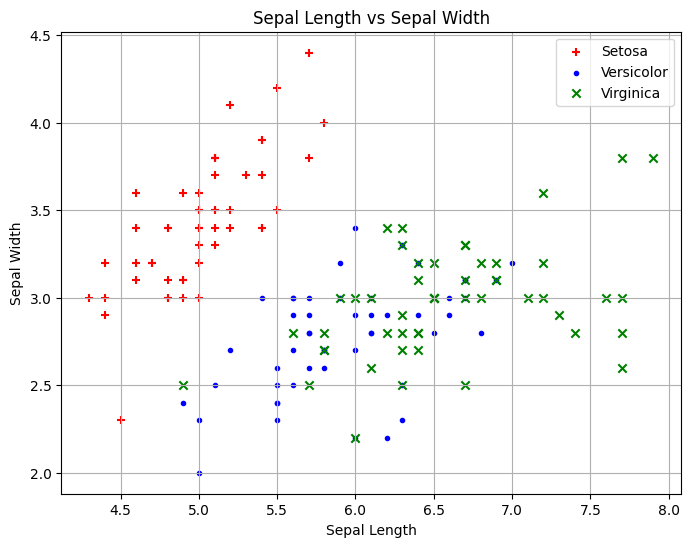

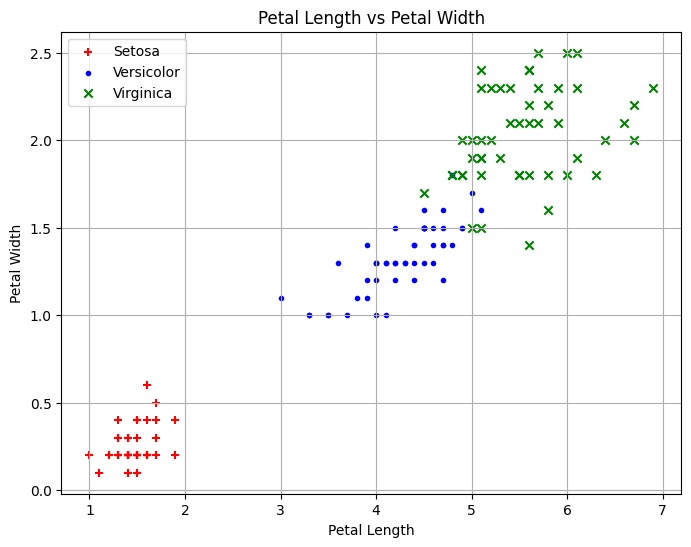

SVM Accuracy: 1.0


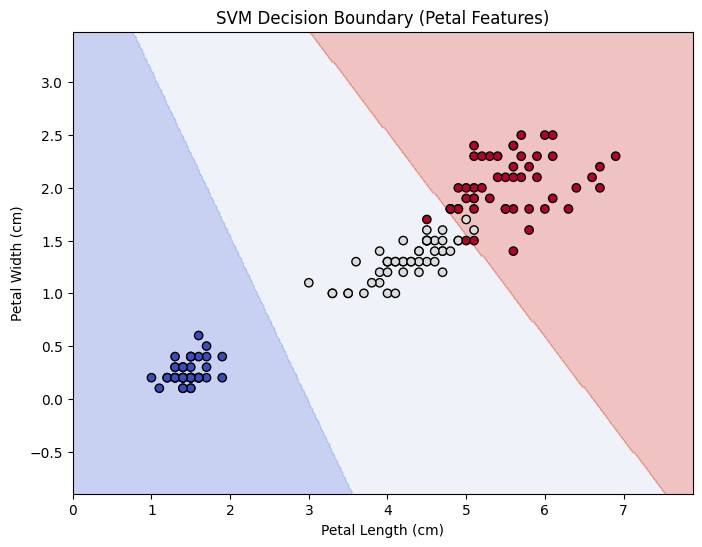

In [ ]:
# Import necessary libraries 
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Convert dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Split dataset manually
df0, df1, df2 = df[:50], df[50:100], df[100:]

# Function to plot scatter plots
def plot_dimensions(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(df0[x], df0[y], color="red", marker='+', label="Setosa")
    plt.scatter(df1[x], df1[y], color="blue", marker='.', label="Versicolor")
    plt.scatter(df2[x], df2[y], color="green", marker='x', label="Virginica")
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter plots
plot_dimensions('sepal length (cm)', 'sepal width (cm)',
                'Sepal Length', 'Sepal Width', "Sepal Length vs Sepal Width")
plot_dimensions('petal length (cm)', 'petal width (cm)',
                'Petal Length', 'Petal Width', "Petal Length vs Petal Width")

# Features and labels
X = df.drop(['target', 'flower_name'], axis='columns')
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Accuracy
print("SVM Accuracy:", model.score(X_test, y_test))

# --- Plot Decision Boundary (2 features only: Petal Length & Petal Width) ---
X_plot = X[['petal length (cm)', 'petal width (cm)']].values
y_plot = y.values

model_2d = SVC(kernel="linear")
model_2d.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("SVM Decision Boundary (Petal Features)")
plt.show()

# ---------------- GUI ----------------
class IrisPredictorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Iris Flower Predictor - SVM Model")
        self.root.geometry("500x400")
        self.root.configure(bg="#f0f8ff")
        
        title_label = tk.Label(root, text="Iris Flower Classification",
                              font=("Arial", 16, "bold"), bg="#f0f8ff", fg="#2e8b57")
        title_label.pack(pady=10)

        input_frame = tk.Frame(root, bg="#f0f8ff")
        input_frame.pack(pady=20)

        self.entries = {}
        features = iris.feature_names
        for i, feature in enumerate(features):
            label = tk.Label(input_frame, text=feature + ":", bg="#f0f8ff", font=("Arial", 10))
            label.grid(row=i, column=0, padx=10, pady=5, sticky="e")
            entry = tk.Entry(input_frame, width=10, font=("Arial", 10))
            entry.grid(row=i, column=1, padx=10, pady=5)
            self.entries[feature] = entry
        
        button_frame = tk.Frame(root, bg="#f0f8ff")
        button_frame.pack(pady=20)
        
        predict_btn = tk.Button(button_frame, text="Predict", command=self.predict,
                               bg="#4CAF50", fg="white", font=("Arial", 12, "bold"))
        predict_btn.pack(side=tk.LEFT, padx=10)
        
        clear_btn = tk.Button(button_frame, text="Clear", command=self.clear,
                             bg="#f44336", fg="white", font=("Arial", 12))
        clear_btn.pack(side=tk.LEFT, padx=10)
        
        self.result_label = tk.Label(root, text="Enter values and click Predict",
                                    font=("Arial", 12), bg="#f0f8ff", fg="#2e8b57")
        self.result_label.pack(pady=20)
        
        accuracy = model.score(X_test, y_test)
        self.accuracy_label = tk.Label(root, text=f"Model Accuracy: {accuracy:.2%}",
                                      font=("Arial", 10), bg="#f0f8ff", fg="#555555")
        self.accuracy_label.pack(pady=10)
    
    def predict(self):
        try:
            input_data = {}
            for feature in iris.feature_names:
                input_data[feature] = [float(self.entries[feature].get())]
            input_df = pd.DataFrame(input_data)
            prediction = model.predict(input_df)
            flower_name = iris.target_names[prediction][0]
            self.result_label.config(text=f"Predicted Flower: {flower_name.capitalize()}", fg="#2e8b57")
        except ValueError:
            messagebox.showerror("Input Error", "Please enter valid numeric values for all fields.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    def clear(self):
        for entry in self.entries.values():
            entry.delete(0, tk.END)
        self.result_label.config(text="Enter values and click Predict")

if __name__ == "__main__":
    root = tk.Tk()
    app = IrisPredictorApp(root)
    root.mainloop()
